# Method 1: Naive Bayes Using SKLEARN

In [69]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.naive_bayes import MultinomialNB  
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [71]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [72]:
df = df.rename(columns={'v1': 'label', 'v2': 'text'})
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [73]:
new_column_order = ['text', 'label']
df = df[new_column_order]
df


,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [74]:
df.info

<bound method DataFrame.info of                                                    text label
0     Go until jurong point, crazy.. Available only ...   ham
1                         Ok lar... Joking wif u oni...   ham
2     Free entry in 2 a wkly comp to win FA Cup fina...  spam
3     U dun say so early hor... U c already then say...   ham
4     Nah I don't think he goes to usf, he lives aro...   ham
...                                                 ...   ...
5567  This is the 2nd time we have tried 2 contact u...  spam
5568              Will Ì_ b going to esplanade fr home?   ham
5569  Pity, * was in mood for that. So...any other s...   ham
5570  The guy did some bitching but I acted like i'd...   ham
5571                         Rofl. Its true to its name   ham

[5572 rows x 2 columns]>

In [75]:
df["label"].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [76]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [77]:
# Load dataset  
X = df['text']
y = df['label']

In [78]:
df2 = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    df2.append(text)

In [79]:
df2

['go until jurong point  crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry in   a wkly comp to win fa cup final tkts   st may     . text fa to       to receive entry question std txt rate t&c's apply            over  's",
 'u dun say so early hor... u c already then say...',
 "nah i don't think he goes to usf  he lives around here though",
 "freemsg hey there darling it's been   week's now and no word back  i'd like some fun you up for it still  tb ok  xxx std chgs to send  å£ .   to rcv",
 'even my brother is not like to speak with me. they treat me like aids patent.',
 "as per your request 'melle melle  oru minnaminunginte nurungu vettam ' has been set as your callertune for all callers. press    to copy your friends callertune",
 'winner   as a valued network customer you have been selected to receivea å£    prize reward  to claim call            . claim code kl   . valid    hours only.',
 'had y

In [80]:
# creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df2).toarray()

In [81]:
X.shape

(5572, 7734)

In [82]:
# Split data  
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [83]:
# Vectorize text  
vectorizer = TfidfVectorizer(stop_words='english')  
X_train_vec = vectorizer.fit_transform(X_train.astype(str))  
X_test_vec = vectorizer.transform(X_test.astype(str))

In [84]:
# Train model  
model = MultinomialNB()  
model.fit(X_train_vec, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [85]:
# Predict & Evaluate
y_pred = model.predict(X_test_vec)  

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9668
[[965   0]
 [ 37 113]]
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [87]:
X_test

3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
944     I sent my scores to sophas and i had to do sec...
1044    We know someone who you know that fancies you....
2484    Only if you promise your getting out as SOON a...
812     Congratulations ur awarded either å£500 of CD ...
                              ...                        
4264     &lt;DECIMAL&gt; m but its not a common car he...
2439    Rightio. 11.48 it is then. Well arent we all u...
5556    Yes i have. So that's why u texted. Pshew...mi...
4205                               Get the door, I'm here
4293    Kit Strip - you have been billed 150p. Netcoll...
Name: text, Length: 1115, dtype: object

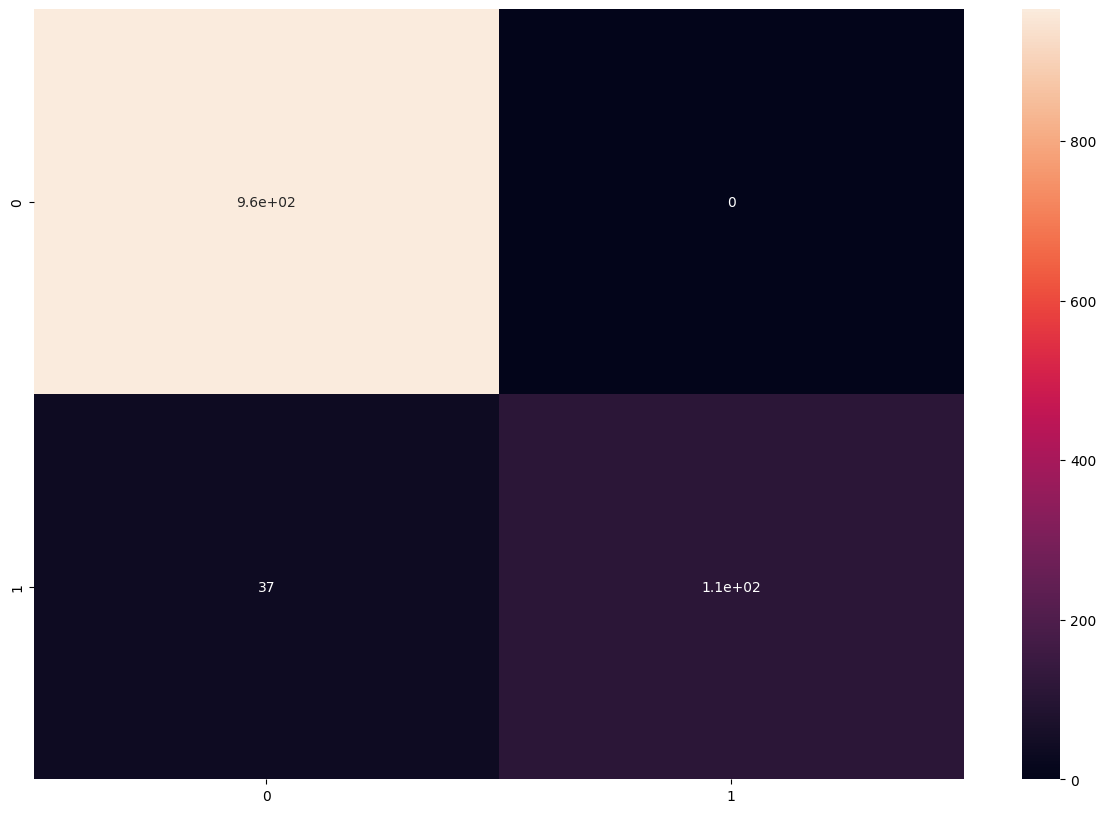

In [88]:
# visualising the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [89]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("naive_bayes_3.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()